# Intervalo aproximado

Estima la cobertura de un intervalo aproximado con simulaciones Monte Carlo. Usa una muestra de datos que siguen una distribución exponencial.

In [1]:
import math
import numpy as np
from scipy.stats import norm, erlang
import matplotlib.pyplot as plt

Parámetro de la exponencial

In [2]:
tau = 10

Tamaño de la muestra

In [3]:
n = 5

Nivel de confianza

In [4]:
confidence_level = 0.9
proba_tail = (1 - confidence_level)/2
proba_tail

0.04999999999999999

Cuantil de la aproximación normal a la PDF de la media muestral $\bar{t} = \frac{1}{n} \sum_{i=1}^n t_i$

In [5]:
quantile = -norm.ppf(proba_tail)
quantile

1.6448536269514729

Número de simulaciones

In [6]:
nsimulations = 10000

Generador de números aleatorios

In [7]:
rng = np.random.default_rng(seed=6870)

Simulación de datos y conteo del número de éxitos

In [8]:
nsuccess = 0

# Guardo los estimadores de τ generados
tau_est_list = []     

for i in range(nsimulations):
    data = rng.exponential(tau, n)
    tau_est = np.mean(data)
    tau1 = tau_est / (1 + quantile/math.sqrt(n))
    tau2 = tau_est / (1 - quantile/math.sqrt(n))
    if tau1 < tau and tau < tau2:
        nsuccess += 1

    tau_est_list.append(tau_est)

In [9]:
nsuccess

9208

Cobertura

In [10]:
coverage = nsuccess / nsimulations

In [11]:
print(f'Cobertura: {coverage*100:2.1f}%')

Cobertura: 92.1%


## Distribución de $\hat{τ}$

In [12]:
xmax = np.max(tau_est_list)
x = np.linspace(0, xmax, 100)
y1 = norm.pdf(x, loc=tau, scale=tau/np.sqrt(n))
y2 = erlang.pdf(n*x, a=n, scale=tau) * n

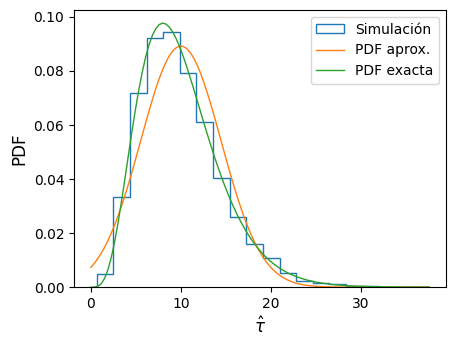

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$\hat{\tau}$")
ax.set_ylabel("PDF")
ax.hist(tau_est_list, density=True, bins=20, histtype='step', label="Simulado")
ax.plot(x, y1, label="PDF aprox.")
ax.plot(x, y2, label="PDF exacta")
plt.legend()